In [2]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import os
import datetime
import numpy as np

os.environ['OMP_NUM_THREADS'] = '13'

In [36]:
df_vhgnss = pd.read_csv('hw6_data/VER_HAND/gnss_ver_hand_att3_popov_1_20250521175012_c6b227dffa3b6992 (1).csv')
df_vpgnss = pd.read_csv('hw6_data/VER_POCK/gnss_ver_pock_att1_popov_1_20250521180450_c6b227dffa3b6992.csv')
df_vhgyro = pd.read_csv('hw6_data/VER_HAND/gyro_ver_hand_att3_popov_1_20250521175012_c6b227dffa3b6992 (1).csv')
df_vpgyro = pd.read_csv('hw6_data/VER_POCK/gyro_ver_pock_att1_popov_1_20250521180450_c6b227dffa3b6992.csv')
df_vhac = pd.read_csv('hw6_data/VER_HAND/acc_ver_hand_att3_popov_1_20250521175012_c6b227dffa3b6992 (1).csv')
df_vpac = pd.read_csv('hw6_data/VER_POCK/acc_ver_pock_att1_popov_1_20250521180450_c6b227dffa3b6992.csv')

df_fhgnss = pd.read_csv('hw6_data/FRU_HAND/gnss_frunza_hand_day2_att1_popov_1_20250524145027_c6b227dffa3b6992.csv')
df_fpgnss = pd.read_csv('hw6_data/FRU_POCK/gnss_frunza_hand_day2_att2_popov_2_20250524150717_c6b227dffa3b6992.csv')
df_fhgyro = pd.read_csv('hw6_data/FRU_HAND/gyro_frunza_hand_day2_att1_popov_1_20250524145027_c6b227dffa3b6992.csv')
df_fpgyro = pd.read_csv('hw6_data/FRU_POCK/gyro_frunza_hand_day2_att2_popov_2_20250524150717_c6b227dffa3b6992.csv')
df_fhac = pd.read_csv('hw6_data/FRU_HAND/acc_frunza_hand_day2_att1_popov_1_20250524145027_c6b227dffa3b6992.csv')
df_fpac = pd.read_csv('hw6_data/FRU_POCK/acc_frunza_hand_day2_att2_popov_2_20250524150717_c6b227dffa3b6992.csv')


In [4]:
df_vhgnss.head(10)

,timestamp[ms],boottime[ms],imei,errorcode,gpstime[ms],lon[degree],lat[degree],alt[m],accuracy[m],speed[m/s],bearing[degree]
0,1747839014441,314035422,c6b227dffa3b6992,-1,1747839014428,37.465423,55.674625,193.354187,6.386519,1.21,245.3
1,1747839016018,314036999,c6b227dffa3b6992,-1,1747839016000,37.465385,55.674613,194.326904,4.443168,1.18,221.2
2,1747839017019,314038000,c6b227dffa3b6992,-1,1747839017000,37.465386,55.674595,192.695984,4.096676,1.19,220.1
3,1747839018018,314038999,c6b227dffa3b6992,-1,1747839018000,37.465377,55.674591,193.423828,3.790093,1.16,219.8
4,1747839019019,314040000,c6b227dffa3b6992,-1,1747839019000,37.465371,55.674582,194.708862,3.790093,1.32,219.3
5,1747839020018,314040999,c6b227dffa3b6992,-1,1747839020000,37.465354,55.674575,192.941711,3.790093,1.24,222.3
6,1747839021018,314041999,c6b227dffa3b6992,-1,1747839021000,37.465340,55.674568,194.455933,3.790093,1.27,219.1
7,1747839022019,314043000,c6b227dffa3b6992,-1,1747839022000,37.465331,55.674558,194.114685,3.790093,1.36,201.0
8,1747839023018,314043999,c6b227dffa3b6992,-1,1747839023000,37.465335,55.674546,193.541565,3.790093,1.41,176.5
9,1747839024019,314045000,c6b227dffa3b6992,-1,1747839024000,37.465350,55.674536,192.940369,3.790093,1.35,150.9


In [37]:
vhgnss_np = df_vhgnss.to_numpy()
vpgnss_np = df_vpgnss.to_numpy()
vhgyro_np = df_vhgyro.to_numpy()
vpgyro_np = df_vpgyro.to_numpy()
vhac_np = df_vhac.to_numpy()
vpac_np = df_vpac.to_numpy()

fhgnss_np = df_fhgnss.to_numpy()
fpgnss_np = df_fpgnss.to_numpy()
fhgyro_np = df_fhgyro.to_numpy()
fpgyro_np = df_fpgyro.to_numpy()
fhac_np = df_fhac.to_numpy()
fpac_np = df_fpac.to_numpy()

In [6]:
def Draw_path_acc(map_to_draw, df_numpy, start_color, finish_color):
    r,g,b = start_color
    R,G,B = finish_color
    stepR, stepG, stepB =((R-r)/len(df_numpy),
                          (G-g)/len(df_numpy),
                          (B-b)/len(df_numpy))
    for frame in df_numpy:
        r, g, b = r + stepR, g + stepG, b + stepB
        color = (f'#{hex(int(r))[2:] if r >= 16 else '0' + hex(int(r))[2:]}'+
                 f'{hex(int(g))[2:] if g >= 16 else '0' + hex(int(g))[2:]}'+
                 f'{hex(int(b))[2:] if b >= 16 else '0' + hex(int(b))[2:]}')
        
        folium.vector_layers.Circle(
            location=[frame[6], frame[5]],
            radius=frame[8],
            color=color,
            fill=False    
        ).add_to(map_to_draw)

In [13]:
map_olymp_vil = folium.Map(location=[55.673349, 37.46314], zoom_start=16)
Draw_path_acc(map_olymp_vil, vhgnss_np, (255,0,0), (255,128,0))
Draw_path_acc(map_olymp_vil, vpgnss_np, (0,255,0), (0,0,255))
map_olymp_vil

In [142]:
map_frunze = folium.Map(location=[55.734014, 37.581512], zoom_start=16)
Draw_path_acc(map_frunze, fhgnss_np, (255,0,0), (255,128,0))
Draw_path_acc(map_frunze, fpgnss_np, (0,255,0), (0,0,255))
map_frunze

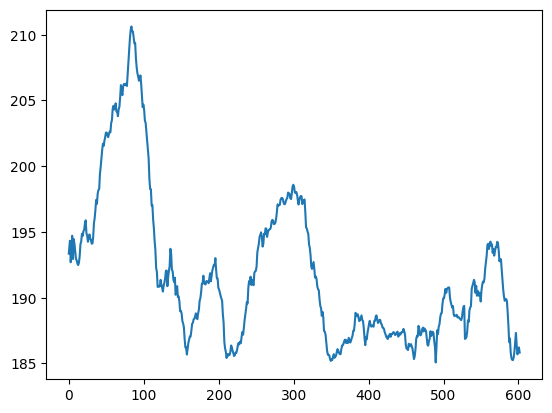

In [302]:
plt.plot([(x[0] - vhgnss_np[0][0])/1000 for x in vhgnss_np], [x[7] for x in vhgnss_np])

In [17]:
def mac(data, window_size):
    '''
    скользящее среднее по элементам массива
    '''
    cumsum_vec = np.cumsum(np.insert(data, 0, 0))
    return (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size

In [18]:
def mac_plot(what, w, COLUMN, fin=None, c='#000000',deep = 1):
    
    if fin == None:
        fin = len(mac([x[COLUMN] for x in what],w))
        
    f, s = [(x[0])/1000 for x in what], [x[COLUMN] for x in what]
    for i in range(deep):
        f, s = mac(f, w), mac(s, w)
    plt.plot(f[:fin], s[:fin], color=c)

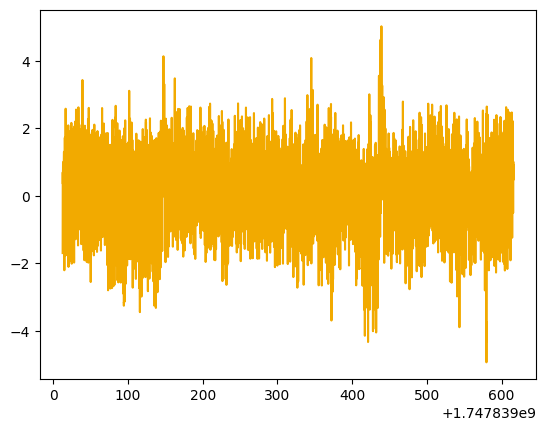

In [308]:
mac_plot(vhac_np, 10, 2, -1, deep = 3, c='#f2aa00')

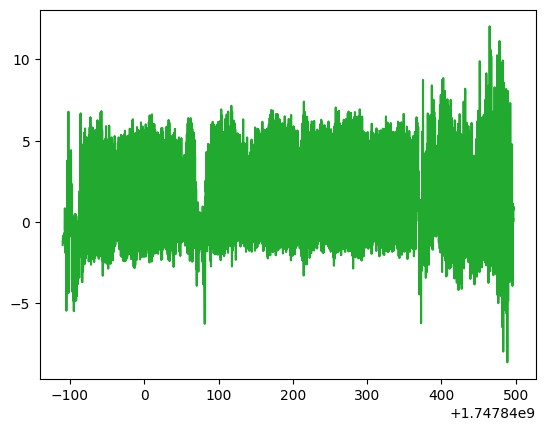

In [306]:
mac_plot(vpac_np, 10, 2, -1, deep = 3, c='#22aa30')

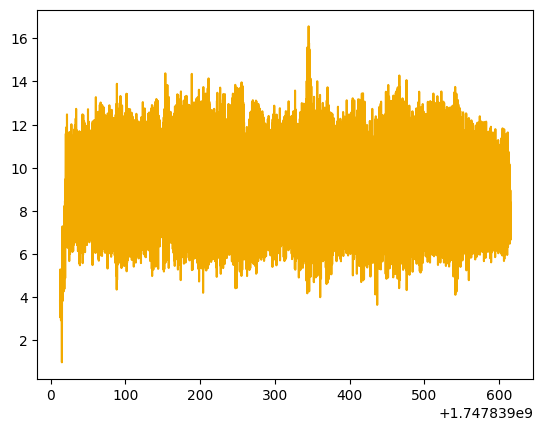

In [309]:
mac_plot(vhac_np, 10, 3, -1, deep = 3, c='#f2aa00')

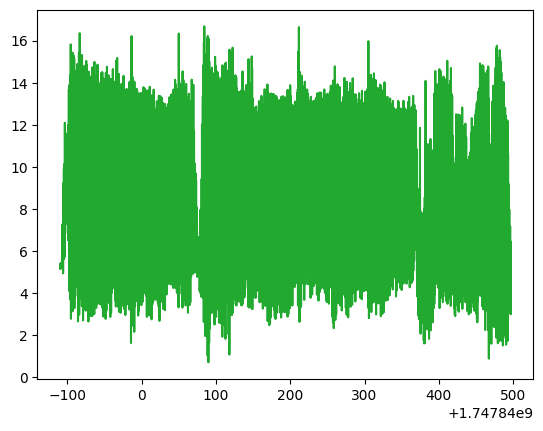

In [319]:
mac_plot(vpac_np, 10, 3, -1, deep = 3,c='#22aa30')

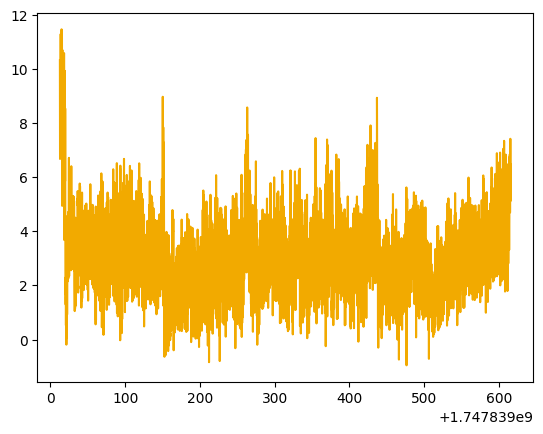

In [310]:
mac_plot(vhac_np, 10, 4, -1, deep = 3, c='#f2aa00')

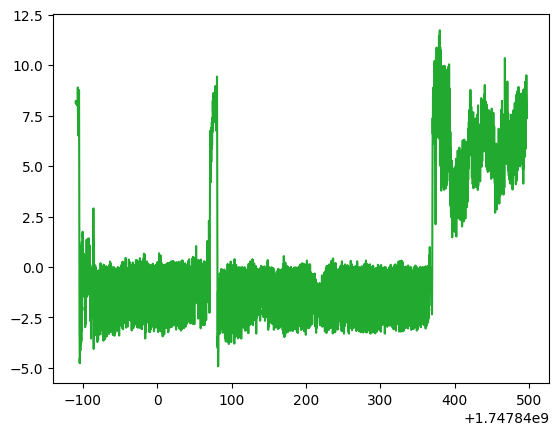

In [162]:
mac_plot(vpac_np, 40, 4, -1, deep = 1,c='#22aa30')

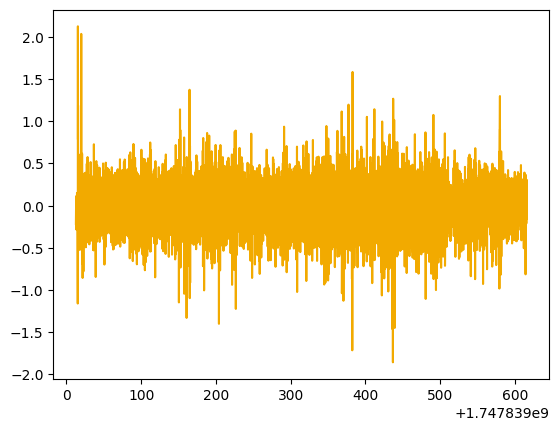

In [312]:
mac_plot(vhgyro_np, 10, 2, -1, deep = 3, c='#f2aa00')

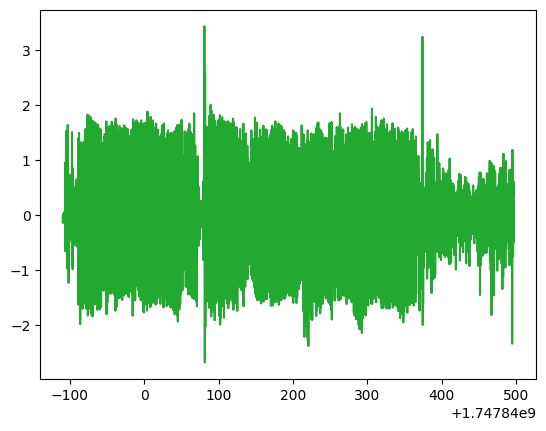

In [313]:
mac_plot(vpgyro_np, 10, 2, -1, deep = 3, c='#22aa30')

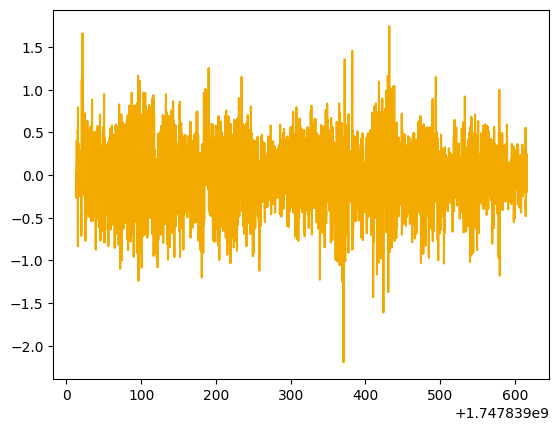

In [314]:
mac_plot(vhgyro_np, 10, 3, -1, deep = 3, c='#f2aa00')

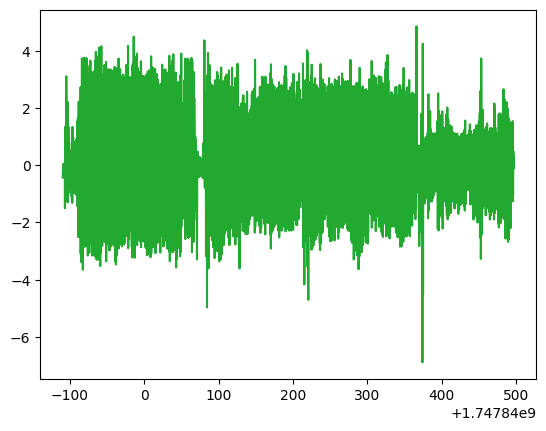

In [315]:
mac_plot(vpgyro_np, 10, 3, -1, deep = 3, c='#22aa30')

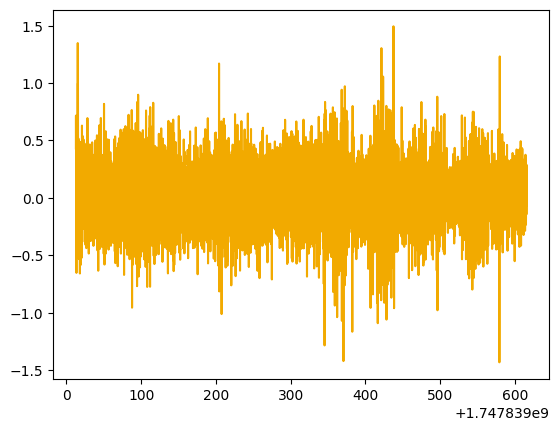

In [316]:
mac_plot(vhgyro_np, 10, 4, -1, deep = 3, c='#f2aa00')

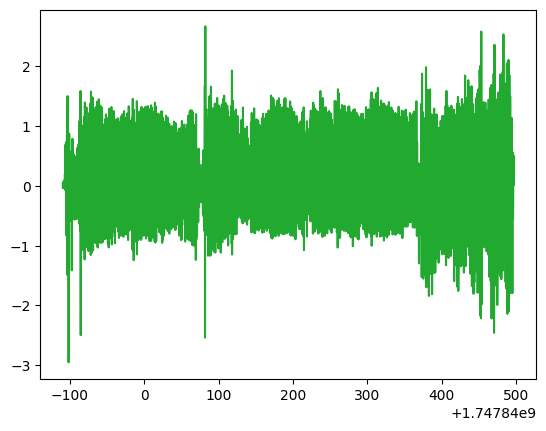

In [317]:
mac_plot(vpgyro_np, 10, 4, -1, deep = 3, c='#22aa30')

In [38]:
def cumsum_integration(to_integrate, dt):
    to_integrate[0] *= dt
    for i in range(1, len(to_integrate)):
        to_integrate[i] *= dt
        to_integrate[i] += to_integrate[i-1]
    return to_integrate

In [120]:
W_z_ver_hand = [x[4] for x in vhgyro_np]
W_z_ver_pock = [x[4] for x in vpgyro_np]
W_z_frunz_hand = [x[4] for x in fhgyro_np]
W_z_frunz_pock = [x[4] for x in fpgyro_np]

A_z_ver_hand = cumsum_integration(W_z_ver_hand, 1)
A_z_ver_pock = cumsum_integration(W_z_ver_pock, 1)
A_z_frunz_hand = cumsum_integration(W_z_frunz_hand, 1)
A_z_frunz_pock = cumsum_integration(W_z_frunz_pock, 1)

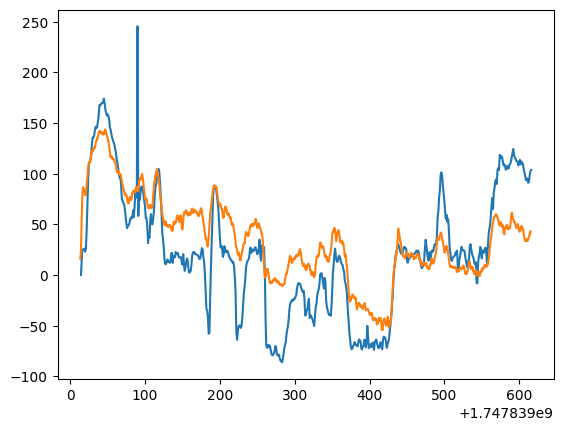

In [41]:
plt.plot([(x[0])/1000  for x in vhgnss_np], [-x[10]+ vhgnss_np[0][10] for x in vhgnss_np])
plt.plot(mac([(x[0])/1000  for x in vhgyro_np],200), mac(A_z_ver_hand,200))

In [43]:
def yawFromQuat(quat):
    '''extract yaw angle from quaternion'''
    q0, q1, q2, q3 = quat
    return np.arctan2(2*(q0*q3 + q1*q2), 1-2*(q2**2+q3**2))

def quatFromYaw(yaw):
    '''make quaternion from yaw angle'''
    q = np.array([np.cos(yaw/2), 0, 0, np.sin(yaw/2)])
    return q

def smoothTh(th, thPrev):
    while th - thPrev > np.pi: 
        th = th - 2*np.pi
    while th - thPrev < -np.pi:
        th = th + 2*np.pi
    return th

def Cr2g(th):
    '''Get rotation matrix: robot to ground'''
    return np.array([[np.cos(th), -np.sin(th)], 
                     [np.sin(th), np.cos(th)]])

def hamProd(a, b):
    '''Hamilton product of two quaternions'''
    return np.array([a[0]*b[0]-a[1]*b[1]-a[2]*b[2]-a[3]*b[3],
                     a[0]*b[1]+a[1]*b[0]+a[2]*b[3]-a[3]*b[2],
                     a[0]*b[2]-a[1]*b[3]+a[2]*b[0]+a[3]*b[1],
                     a[0]*b[3]+a[1]*b[2]-a[2]*b[1]+a[3]*b[0]])

def loadSensor(dataPath, tStart):
    with open(dataPath, 'r') as fileId:
        C = np.loadtxt(fileId, delimiter=',', skiprows=2)
    t = C[:, 0]
    data = C[:, 1:]
    t = (t - tStart) / 1e3
    return t, data

def get_start_time(dataPath):
    with open(dataPath, 'r') as fileId:
        C = np.loadtxt(fileId, delimiter=',', skiprows=2, max_rows=1)
    print(C)
    return C[0]

def exponential_smoothing(data):
    smoothed_data = np.zeros_like(data)
    smoothed_data[0,:] = data[0,:]
    alpha = np.logspace(base=10., start=-3., stop=0., num = data.shape[0], endpoint=True)[::-1]
    for i in range(1, data.shape[0]):
        smoothed_data[i,:] = alpha[i] * data[i,:] + (1 - alpha[i]) * smoothed_data[i-1,:]
    return smoothed_data

In [76]:
def reconstruct_with_quaternion(gyrocsv_np):
    qPrev = quatFromYaw(0)
    thPrev = 0
    ans_q = [qPrev]
    ans_ang = [thPrev]
    for i in range(len(gyrocsv_np) - 1):
        qw = np.concatenate(([0], gyrocsv_np[i, 2:]))
        qdot = 1/2 * hamProd(qPrev, qw)
        dt = 0.001 * (gyrocsv_np[i+1, 0] - gyrocsv_np[i, 0])
        q = qPrev + qdot*dt
        ans_q.append(q)
        th = smoothTh(yawFromQuat(q), thPrev)
        ans_ang.append(th * 180/np.pi)
        qPrev = q
        thPrev = th
    return ans_ang

In [116]:
def plots_IB_needs(gnssref_np, gyrocvv_np, simpInt_angels, smooth=100, flip = False, hide_z = False):
    ans_ang = reconstruct_with_quaternion(gyrocvv_np)

    if not flip:
        flip = -1
    stt = gyrocvv_np[0][0]
    plt.plot(mac([(x[0]-stt)/1000  for x in gyrocvv_np] ,smooth), mac(ans_ang,smooth), c='r')
    if not hide_z:
        plt.plot(mac([(x[0]-stt)/1000  for x in gyrocvv_np],smooth), mac(simpInt_angels,smooth), c='g')
    plt.plot([(x[0]-stt)/1000  for x in gnssref_np], [flip * (x[10]- gnssref_np[0][10]) for x in gnssref_np], c='k')

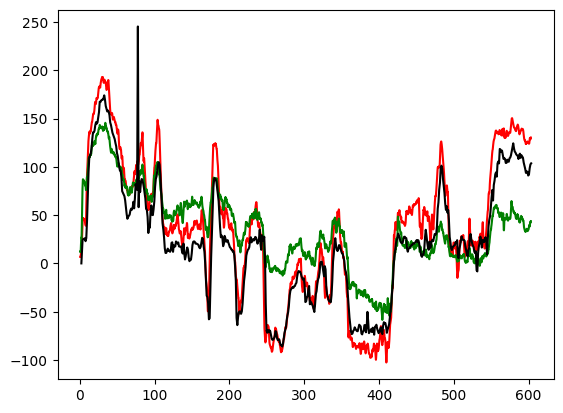

In [117]:
plots_IB_needs(vhgnss_np,vhgyro_np,A_z_ver_hand)
#черный - референс гпс
#зеленый - интегрирование по OZ
#красный - востановление с кватеринионами

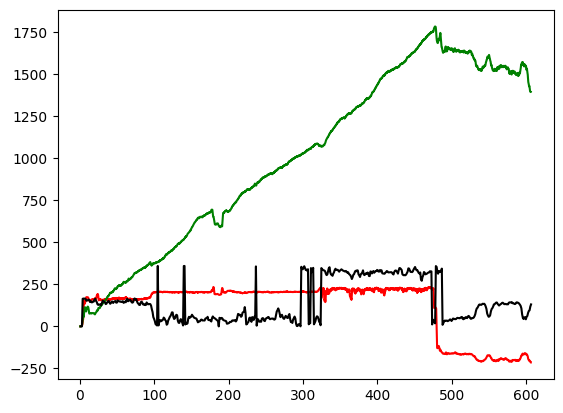

In [318]:
plots_IB_needs(vpgnss_np,vpgyro_np,A_z_ver_pock,flip=True,hide_z=0)

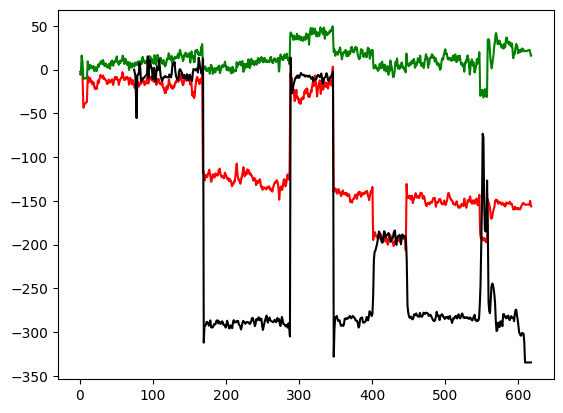

In [277]:
plots_IB_needs(fhgnss_np,fhgyro_np,A_z_frunz_hand,hide_z=0,flip=True)

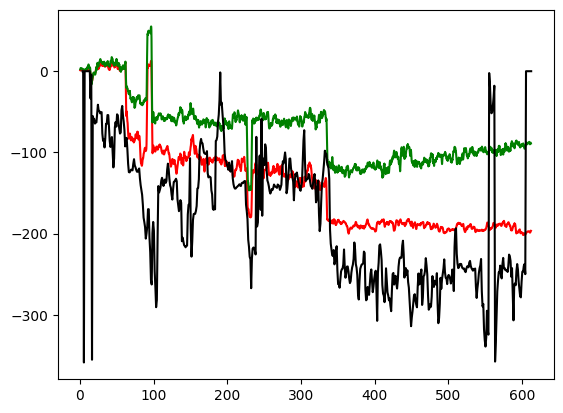

In [278]:
plots_IB_needs(fpgnss_np,fpgyro_np,A_z_frunz_pock,hide_z=0)

In [284]:
vh_ang = reconstruct_with_quaternion(vhgyro_np)
xa, ya, za = [x[2] for x in vhac_np], [x[3] for x in vhac_np], [x[4] for x in vhac_np]
xv, yv, zv = cumsum_integration(xa, 0.01), cumsum_integration(ya, 0.01), cumsum_integration(za, 0.01)
vh_mom_vel = [(xv[i]**2 + yv[i]**2 + zv[i]**2)**0.5 for i in range(len(xv))]


a = 3.3
cordx, cordy= [0],[0]
for i in range(len(vh_mom_vel)):
    cordx.append((xv[i]*np.cos(vh_ang[i]*np.pi/180+a) + yv[i]*np.sin(vh_ang[i]*np.pi/180+a)))
    cordx[-1] += cordx[-2]
    cordy.append((yv[i]*np.cos(vh_ang[i]*np.pi/180+a) - xv[i]*np.sin(vh_ang[i]*np.pi/180+a)))
    cordy[-1] += cordy[-2]

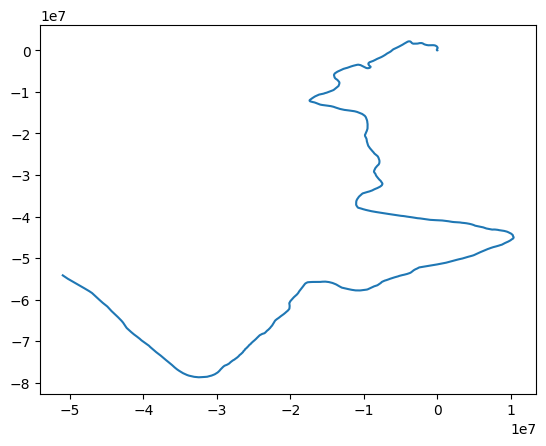

In [285]:
plt.plot(cordx, cordy)

In [292]:
map_olymp_vil = folium.Map(location=[55.673349, 37.46314], zoom_start=16)
Draw_path_acc(map_olymp_vil, vhgnss_np, (255,0,0), (255,128,0))

for i in range(len(cordx))[::100]:
        
        color = (f'#000000')
        
        folium.vector_layers.Circle(
            location=[cordx[i]/(2E10*0.85*2)+ vhgnss_np[0][6], cordy[i]/(2E10*0.5*2)+ vhgnss_np[0][5]],
            radius=1,
            color=color,
            fill=False    
        ).add_to(map_olymp_vil)
    
map_olymp_vil